# Instalar Dependências

In [24]:
#%pip install numpy scipy matplotlib


import os
import re
import math
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from typing import List
from typing import List
from dataclasses import dataclass, field

# Explicação do Código

O código inicializa várias variáveis e estruturas de dados para processamento de informações relacionadas a questões e usuários. Aqui está uma explicação de cada parte:

1. **Diretórios e Caminhos**:

   ```python
   usuarios = 'D:\\Trabalho_Super\\Processamento\\UsuariosProcessamento'
   base_path = 'D:\\Trabalho_Super\\Processamento\\Provas'
   pasta_graficos = 'D:/Trabalho_Super/Processamento/Graficos'


In [25]:
usuarios=r'Processamento\UsuariosProcessamento'
base_path = r'Processamento\Provas'


pasta_graficos = r'Processamento\Graficos'

# Inicializa uma lista vazia para armazenar as questões com o id
questoes = []

# Inicializa uma lista vazia para armazenar as questões com dificuldade calculada
questoes_com_dificuldade = []

# Inicializa uma lista ou dicionário para armazenar as questões completas (dependendo da estrutura que você precisa)
questoes_completas = []

# Inicializa um conjunto ou lista para rastrear os usuários processados
usuarios_processados = []

# Explicação do Código

Este notebook explica o código Python que define várias classes usando `dataclasses`. Essas classes são usadas para modelar questões, exercícios, avaliações, cursos e usuários.


In [26]:


@dataclass
class Questao:
    id: int
    dificuldade: float = 0.0
    discriminacao: float = 0.0
    respostas: int = 0
    usuarios_respondidos: list[int] = field(default_factory=list)  # Inicializa com uma lista vazia


@dataclass
class Exercise:
    number: int
    codes: List[int]  # Lista de códigos de exercícios

@dataclass
class Assessment:
    assessment_title: str
    class_name: str
    class_number: int
    start: str
    end: str
    language: str
    codemirror_mode: str
    type: str
    weight: int
    total_exercises: int
    exercises: List[Exercise] = field(default_factory=list)
    filename: str = ""  # Novo atributo para armazenar o nome do arquivo


@dataclass
class Curso:
    laboratorios: List[Assessment] = field(default_factory=list)



@dataclass
class Usuario:
    id: int
    media: float = 0.0
    notas: List[int] = field(default_factory=list)
    

    def adicionar_nota(self, nota):
        self.notas.append(nota)

    def calcular_media(self):
        if len(self.notas) > 0:
            soma_notas = sum(self.notas)
            # Dividindo a soma das notas por 6
            self.media = soma_notas / 6
        else:
            self.media = 0  # Define a média como 0 se não houver notas



# Processamento dos Arquivos: catalogar provas e suas questões

O objetivo dessas funções é catalogar cada prova e suas questões.

In [27]:
def ler_assessment_file(filepath: str) -> Assessment:
    with open(filepath, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    assessment_data = {}
    exercises = []

    # Variáveis de controle
    in_exercises_section = False

    for line in lines:
        line = line.strip()

        # Verifica se estamos na seção de dados da avaliação
        if line.startswith('-- ASSESSMENT DATA:'):
            in_exercises_section = False
            continue

        # Verifica se estamos na seção de exercícios
        if line.startswith('-- EXERCISES:'):
            in_exercises_section = True
            continue

        if not in_exercises_section:
            # Extrai informações da avaliação
            match = re.match(r'---- (.+?): (.+)', line)
            if match:
                key, value = match.groups()
                if key == 'assessment title':
                    assessment_data['assessment_title'] = value
                elif key == 'class name':
                    assessment_data['class_name'] = value
                elif key == 'class number':
                    assessment_data['class_number'] = int(value)
                elif key == 'start':
                    assessment_data['start'] = value
                elif key == 'end':
                    assessment_data['end'] = value
                elif key == 'language':
                    assessment_data['language'] = value
                elif key == 'codemirror mode':
                    assessment_data['codemirror_mode'] = value
                elif key == 'type':
                    assessment_data['type'] = value
                elif key == 'weight':
                    assessment_data['weight'] = int(value)
                elif key == 'total_exercises':
                    assessment_data['total_exercises'] = int(value)
        else:
            # Extrai dados dos exercícios
            match = re.match(r'---- exercise (\d+): (.+)', line)
            if match:
                number, codes = match.groups()
                exercise_number = int(number)
                codes_list = list(map(int, codes.split(' or ')))
                exercises.append(Exercise(number=exercise_number, codes=codes_list))

    # Cria o objeto Assessment
    assessment = Assessment(
        assessment_title=assessment_data['assessment_title'],
        class_name=assessment_data['class_name'],
        class_number=assessment_data['class_number'],
        start=assessment_data['start'],
        end=assessment_data['end'],
        language=assessment_data['language'],
        codemirror_mode=assessment_data['codemirror_mode'],
        type=assessment_data['type'],
        weight=assessment_data['weight'],
        total_exercises=assessment_data['total_exercises'],
        exercises=exercises,
        filename=os.path.basename(filepath)  # Salva o nome do arquivo
    )

    return assessment


def processar_assessments(assessments_path, todos=0):
    curso = Curso()

    for root, dirs, files in os.walk(assessments_path):
        for filename in files:
            if filename.endswith('.data'):
                filepath = os.path.join(root, filename)
                assessment = ler_assessment_file(filepath)
                if assessment:
                    curso.laboratorios.append(assessment)

    return curso



def imprimir_assessment(assessment: Assessment):
    print(f"Assessment Title: {assessment.assessment_title}")
    print(f"Class Name: {assessment.class_name}")
    print(f"Class Number: {assessment.class_number}")
    print(f"Start: {assessment.start}")
    print(f"End: {assessment.end}")
    print(f"Language: {assessment.language}")
    print(f"Codemirror Mode: {assessment.codemirror_mode}")
    print(f"Type: {assessment.type}")
    print(f"Weight: {assessment.weight}")
    print(f"Total Exercises: {assessment.total_exercises}")
    print(f"Filename: {assessment.filename}")  # Imprime o nome do arquivo
    print("Exercises:")
    for exercise in assessment.exercises:
        codes = ' or '.join(map(str, exercise.codes))
        print(f"  Exercise {exercise.number}: {codes}")
    print()


def imprimir_curso(curso: Curso):
    for assessment in curso.laboratorios:
        imprimir_assessment(assessment)


In [28]:
curso = processar_assessments(base_path)

imprimir_curso(curso)

Assessment Title: Prova Final
Class Name: Introdução à Ciência dos Computadores
Class Number: 557
Start: 2024-04-01 10:05
End: 2024-04-01 11:55
Language: Python 3
Codemirror Mode: python/python.js
Type: exam
Weight: 1
Total Exercises: 4
Filename: 5551.data
Exercises:
  Exercise 1: 6844 or 6845 or 6846 or 6847 or 6848 or 6849
  Exercise 2: 1488 or 1489 or 1490 or 1491 or 1492 or 1494 or 1495 or 1496 or 3051
  Exercise 3: 1653 or 1654 or 1655 or 1656 or 1657 or 1658 or 1649 or 1650 or 1651 or 1652
  Exercise 4: 6192 or 6191 or 6173 or 6247 or 6246

Assessment Title: Prova Final
Class Name: Introdução à Ciência dos Computadores
Class Number: 594
Start: 2024-08-07 16:00
End: 2024-08-07 17:55
Language: Python 3
Codemirror Mode: python/python.js
Type: exam
Weight: 1
Total Exercises: 4
Filename: 5950.data
Exercises:
  Exercise 1: 6844 or 6845 or 6846 or 6847 or 6848 or 6849
  Exercise 2: 1488 or 1489 or 1490 or 1491 or 1492 or 1494 or 1495 or 1496 or 3051
  Exercise 3: 1653 or 1654 or 1655 or

In [29]:
def catalogar_questoes():
    questoes = []
    ids_adicionados = set()

    for lab in curso.laboratorios:
        for exercise in lab.exercises:
            for code in exercise.codes:
                if code not in ids_adicionados:
                    questao = Questao(dificuldade=0, id=code)
                    questoes.append(questao)
                    ids_adicionados.add(code)

    return questoes


In [30]:
questoes = catalogar_questoes()

for questao in questoes:
    print(questao)

Questao(id=6844, dificuldade=0, discriminacao=0.0, respostas=0, usuarios_respondidos=[])
Questao(id=6845, dificuldade=0, discriminacao=0.0, respostas=0, usuarios_respondidos=[])
Questao(id=6846, dificuldade=0, discriminacao=0.0, respostas=0, usuarios_respondidos=[])
Questao(id=6847, dificuldade=0, discriminacao=0.0, respostas=0, usuarios_respondidos=[])
Questao(id=6848, dificuldade=0, discriminacao=0.0, respostas=0, usuarios_respondidos=[])
Questao(id=6849, dificuldade=0, discriminacao=0.0, respostas=0, usuarios_respondidos=[])
Questao(id=1488, dificuldade=0, discriminacao=0.0, respostas=0, usuarios_respondidos=[])
Questao(id=1489, dificuldade=0, discriminacao=0.0, respostas=0, usuarios_respondidos=[])
Questao(id=1490, dificuldade=0, discriminacao=0.0, respostas=0, usuarios_respondidos=[])
Questao(id=1491, dificuldade=0, discriminacao=0.0, respostas=0, usuarios_respondidos=[])
Questao(id=1492, dificuldade=0, discriminacao=0.0, respostas=0, usuarios_respondidos=[])
Questao(id=1494, difi

# Processamento: calculo da dificuldade

Calcular as dificuldades das questões, usando as notas que cada usuário tem nas questões e fazendo uma média simples. 

In [31]:
def obter_nota_arquivo(arquivo_path: str) -> int:
    try:
        with open(arquivo_path, 'r', encoding='utf-8') as file:
            conteudo = file.read()
            # Usar regex para encontrar todas as ocorrências de notas no formato '-- GRADE:'
            notas = re.findall(r'-- GRADE:\s*(\d+)%', conteudo)
            if notas:
                # Converter todas as notas encontradas para inteiros e pegar a última
                return int(notas[-1])
    except FileNotFoundError:
        pass
    return 0

def calcular_dificuldade(questoes):
    for questao in questoes:
        if questao.respostas > 0:
            questao.dificuldade /= questao.respostas
            questao.dificuldade = 100 - questao.dificuldade
        else:
            questao.dificuldade = 0  # Define a dificuldade como 0 se não houver respostas

    return questoes

def respostas_questao(questoes):
    questoes_por_id = {questao.id: questao for questao in questoes}

    if not os.path.exists(usuarios):
        print(f"A pasta {usuarios} não existe.")
        return questoes

    for user_dir in os.listdir(usuarios):
        user_executions_path = os.path.join(usuarios, user_dir, "executions")
        
        if not os.path.exists(user_executions_path):
            continue

        for log_file in os.listdir(user_executions_path):
            if log_file.endswith('.log'):
                # Extrai o ID da questão do nome do arquivo
                try:
                    questao_id = int(log_file.split('_')[1].split('.')[0])
                    if questao_id in questoes_por_id:
                        # Incrementa a quantidade de respostas
                        
                        questoes_por_id[questao_id].usuarios_respondidos.append(user_dir)
                        questoes_por_id[questao_id].respostas += 1
                        
                        # Obter a nota do arquivo de execução e adicionar à dificuldade
                        log_file_path = os.path.join(user_executions_path, log_file)
                        nota = obter_nota_arquivo(log_file_path)
                        questoes_por_id[questao_id].dificuldade += nota
                        
                except (IndexError, ValueError):
                    continue

    return calcular_dificuldade(questoes)



# Exemplo de uso

def formatar_questao(questao):
    return (f"Questao(id={questao.id}, "
            f"dificuldade={questao.dificuldade:.2f}, "
            f"discriminacao={questao.discriminacao:.2f}, "
            f"respostas={questao.respostas}, "
            f"usuarios={questao.usuarios_respondidos})")


In [32]:

questoes_com_dificuldade = respostas_questao(questoes)


questoes_com_dificuldade.sort(key=lambda x: x.respostas, reverse=True)


for questao in questoes_com_dificuldade:

    print(formatar_questao(questao))

Questao(id=6756, dificuldade=4.69, discriminacao=0.00, respostas=64, usuarios=['2549', '7215', '7702', '8233', '8654', '8793', '8793', '8880', '9149', '9160', '9163', '9180', '9221', '9225', '9232', '9236', '9247', '9248', '9264', '9274', '9276', '9280', '9296', '9297', '9312', '9680', '9685', '9686', '9693', '9694', '9709', '9711', '9711', '9733', '9739', '9741', '9743', '9754', '9755', '9756', '9756', '9758', '9759', '9763', '9764', '9796', '9801', '9804', '9807', '9810', '9813', '9820', '9828', '9829', '9833', '9838', '9871', '9888', '9895', '9940', '9952', '9954', '9955', '9978'])
Questao(id=6753, dificuldade=5.66, discriminacao=0.00, respostas=53, usuarios=['2549', '4815', '6310', '6903', '7576', '8656', '8785', '8793', '9131', '9162', '9164', '9165', '9184', '9201', '9205', '9225', '9227', '9228', '9233', '9234', '9243', '9248', '9310', '9312', '9669', '9670', '9675', '9678', '9680', '9682', '9710', '9734', '9739', '9744', '9747', '9751', '9753', '9762', '9763', '9766', '9769', '

# Processamento: coletar as notas de todos os usuários.

Nessa etapa, vamos pegar todas as notas de cada usuário para gerar a sua média final na disciplina, que são 6 notas divididas por 6.

In [33]:
def calcular_media_final_usuario(usuarios_processados):
    for id_usuario, usuario in usuarios_processados.items():
        usuario.calcular_media()
    return usuarios_processados



def processar_usuarios():
    usuarios_dict = {}
    
    # Verifique se o caminho é uma string
    if not isinstance(usuarios, str):
        raise TypeError("O caminho 'usuarios' deve ser uma string.")

    for pasta_usuario in os.listdir(usuarios):
        caminho_pasta_usuario = os.path.join(usuarios, pasta_usuario)
        
        if os.path.isdir(caminho_pasta_usuario):
            id_usuario = pasta_usuario
            usuario = Usuario(id_usuario)
            caminho_grades = os.path.join(caminho_pasta_usuario, 'grades')
            
            if os.path.isdir(caminho_grades):  # Verifica se o diretório 'grades' existe
                for arquivo_log in os.listdir(caminho_grades):
                    if arquivo_log.endswith('.log'):  # Verifica arquivos com extensão '.log'
                        caminho_arquivo_log = os.path.join(caminho_grades, arquivo_log)
                        print(f'Processando arquivo {arquivo_log} para o usuário {id_usuario} em {caminho_arquivo_log}')
                        
                        with open(caminho_arquivo_log, 'r') as arquivo:
                            encontrado_nota = False
                            for linha in arquivo:
                                # Debug: Exibir cada linha lida
                                print(f'Linha lida: {linha.strip()}')

                                # Ajusta a expressão regular para capturar números inteiros e decimais
                                match = re.search(r'grade \(0-10\): (\d+(\.\d+)?)', linha)
                                if match:
                                    nota = float(match.group(1))
                                    usuario.adicionar_nota(nota)
                                    encontrado_nota = True
                                    break  # Sai do loop após encontrar a nota
                            
                            if not encontrado_nota:
                                print(f'Nota não encontrada no arquivo {arquivo_log} para o usuário {id_usuario}')
            
            else:
                print(f'O diretório grades não foi encontrado para o usuário {id_usuario}')
            
            usuarios_dict[id_usuario] = usuario
    
    return calcular_media_final_usuario(usuarios_dict)

  


In [34]:
# Exemplo de uso:
usuarios_processados = processar_usuarios()



Processando arquivo 5258.log para o usuário 1380 em Processamento\UsuariosProcessamento\1380\grades\5258.log
Linha lida: ---- grade (0-10): 10
Processando arquivo 5412.log para o usuário 1380 em Processamento\UsuariosProcessamento\1380\grades\5412.log
Linha lida: ---- grade (0-10): 10
Processando arquivo 5470.log para o usuário 1380 em Processamento\UsuariosProcessamento\1380\grades\5470.log
Linha lida: ---- grade (0-10): 10
Processando arquivo 5527.log para o usuário 1380 em Processamento\UsuariosProcessamento\1380\grades\5527.log
Linha lida: ---- grade (0-10): 10
Processando arquivo 5540.log para o usuário 1380 em Processamento\UsuariosProcessamento\1380\grades\5540.log
Linha lida: ---- grade (0-10): 10
Processando arquivo 5550.log para o usuário 1380 em Processamento\UsuariosProcessamento\1380\grades\5550.log
Linha lida: ---- grade (0-10): 10
Processando arquivo 5268.log para o usuário 1900 em Processamento\UsuariosProcessamento\1900\grades\5268.log
Linha lida: ---- grade (0-10): 10

In [35]:
# Exibir os resultados para verificação
for id_usuario, usuario in usuarios_processados.items():
    print(f'ID: {usuario.id}')
    print(f'Notas: {usuario.notas}')
    print(f'Média: {usuario.media}')

ID: 1380
Notas: [10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
Média: 10.0
ID: 1900
Notas: [10.0, 7.5, 10.0, 7.5]
Média: 5.833333333333333
ID: 2490
Notas: [10.0, 10.0, 10.0, 7.5, 10.0, 7.5]
Média: 9.166666666666666
ID: 2549
Notas: [10.0, 10.0, 0.0, 2.5, 5.0]
Média: 4.583333333333333
ID: 2970
Notas: [10.0, 0.0]
Média: 1.6666666666666667
ID: 3469
Notas: [10.0, 10.0]
Média: 3.3333333333333335
ID: 3613
Notas: [10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
Média: 10.0
ID: 3775
Notas: [10.0, 7.5, 5.0, 0.0, 5.0]
Média: 4.583333333333333
ID: 3967
Notas: [10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
Média: 10.0
ID: 4019
Notas: [10.0]
Média: 1.6666666666666667
ID: 4054
Notas: [10.0, 10.0]
Média: 3.3333333333333335
ID: 4226
Notas: [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 0.0]
Média: 10.0
ID: 4296
Notas: [10.0, 10.0, 10.0, 10.0, 7.5]
Média: 7.916666666666667
ID: 4390
Notas: [2.5, 5.0]
Média: 1.25
ID: 4456
Notas: [10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
Média: 10.0
ID: 4494
Notas: [10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
Média: 10.0
ID: 4

# Processamento: calculo da discriminação

Nessa etapa, vamos calcular a discriminação para cada questão.

In [36]:


# Supondo que usuarios_processados seja um dicionário onde a chave é o ID do usuário e o valor é o objeto Usuario


# Calcular a média final das notas dos alunos (MT)
total_media = 0
total_alunos = len(usuarios_processados)

for id_usuario, usuario in usuarios_processados.items():
    
    total_media += usuario.media

# Média final (MT)
media_final = total_media / total_alunos if total_alunos > 0 else 0
print(f'Média Final (MT): {media_final}')

# Calcular o desvio padrão das notas finais dos alunos (DPT)
soma_dos_quadrados_das_diferencas = 0

for id_usuario, usuario in usuarios_processados.items():
    diferenca = usuario.media - media_final
    soma_dos_quadrados_das_diferencas += diferenca ** 2

# Desvio padrão (DPT)
desvio_padrao = math.sqrt(soma_dos_quadrados_das_diferencas / total_alunos) if total_alunos > 0 else 0
print(f'Desvio Padrão (DPT): {desvio_padrao}')


Média Final (MT): 7.163486258865255
Desvio Padrão (DPT): 3.236331603979935


In [37]:


def calcular_discriminacao(questoes, usuarios):
    for questao in questoes:
        usuarios_que_acertaram = [usuario_id for usuario_id in questao.usuarios_respondidos]
        notas_usuarios_acertaram = [usuario.media for usuario in usuarios.values() if usuario.id in usuarios_que_acertaram]
        notas_todos_usuarios = [usuario.media for usuario in usuarios.values()]

        if notas_usuarios_acertaram:
            MQ = np.mean(notas_usuarios_acertaram)
        else:
            MQ = 0

        if notas_todos_usuarios:
            MT = np.mean(notas_todos_usuarios)
            DPT = np.std(notas_todos_usuarios)
        else:
            MT = 0
            DPT = 1  # Evitar divisão por zero

        p = len(notas_usuarios_acertaram) / len(notas_todos_usuarios)
        q = 1 - p

        if DPT != 0:
            discriminacao = (MQ - MT) / DPT * np.sqrt(p / q)
        else:
            discriminacao = 0

        questao.discriminacao = float(discriminacao)  # Convertendo para float padrão

    return questoes



  


In [38]:
questoes_completas = calcular_discriminacao(questoes_com_dificuldade, usuarios_processados)
questoes_ordenadas = sorted(questoes_completas, key=lambda q: q.discriminacao, reverse=True)

for questao in questoes_ordenadas:
    # Convertendo para float e formatando com duas casas decimais
    questao.dificuldade = float(questao.dificuldade)
    questao.discriminacao = float(questao.discriminacao)
    
    # Formatação da string com todos os atributos
    print(f'Questao(id={questao.id}, dificuldade={questao.dificuldade:.2f}, discriminacao={questao.discriminacao:.2f}, '
          f'respostas={questao.respostas}, usuarios_respondidos={questao.usuarios_respondidos})')



Questao(id=6209, dificuldade=6.25, discriminacao=0.21, respostas=32, usuarios_respondidos=['3613', '6310', '6458', '7576', '7672', '7702', '8793', '8807', '9165', '9192', '9205', '9216', '9217', '9228', '9244', '9248', '9273', '9279', '9665', '9673', '9741', '9755', '9779', '9798', '9826', '9829', '9830', '9841', '9848', '9876', '9932', '9955'])
Questao(id=6832, dificuldade=6.30, discriminacao=0.19, respostas=37, usuarios_respondidos=['6457', '8656', '8785', '9161', '9178', '9212', '9217', '9220', '9227', '9229', '9235', '9278', '9286', '9671', '9678', '9684', '9690', '9705', '9708', '9734', '9741', '9742', '9745', '9746', '9775', '9777', '9779', '9791', '9801', '9818', '9822', '9827', '9828', '9888', '9940', '9952', '9953'])
Questao(id=1646, dificuldade=18.75, discriminacao=0.19, respostas=32, usuarios_respondidos=['7607', '8289', '9163', '9178', '9232', '9242', '9264', '9271', '9286', '9296', '9663', '9671', '9686', '9703', '9708', '9710', '9743', '9745', '9764', '9769', '9773', '977

# CRiacao do CSV

In [39]:
import csv
from dataclasses import dataclass, field

questoes_ordenadas = sorted(questoes_ordenadas, key=lambda questao: questao.id)

with open('questoes_ordenadas.csv', mode='w', newline='') as csvfile:
    fieldnames = ['id', 'dificuldade', 'discriminacao', 'respostas', 'usuarios_respondidos']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Escrevendo cabeçalho
    writer.writeheader()

    # Escrevendo dados de cada questão que tenha pelo menos 16 respostas
    for questao in questoes_ordenadas:
        if questao.respostas >= 16:
            writer.writerow({
                'id': questao.id,
                'dificuldade': f"{questao.dificuldade:.2f}",
                'discriminacao': f"{questao.discriminacao:.2f}",
                'respostas': questao.respostas,
                'usuarios_respondidos': ','.join(map(str, questao.usuarios_respondidos))
            })

print("Arquivo 'questoes_ordenadas.csv' criado com sucesso.")

Arquivo 'questoes_ordenadas.csv' criado com sucesso.


# Processamento: Geração dos Gráficos

Gerar os gráficos de cada questão, usando o modelo da tri de 2 parâmetros (dificuldade e discriminação).

In [40]:


contador_usuarios = 0
for id_usuario, usuario in usuarios_processados.items():
    if len(usuario.notas) > 6:  # Verifica se o usuário tem mais de 6 notas
        print(f'ID: {usuario.id}')
        print(f'Notas: {usuario.notas}')
        print(f'Média: {usuario.media}')
        
        contador_usuarios += 1

quantidade_total_usuarios = len(usuarios_processados)
print(f'\nQuantidade total de usuários: {quantidade_total_usuarios}')
print(f'Quantidade de usuários com mais de 6 notas: {contador_usuarios}')

ID: 4226
Notas: [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 0.0]
Média: 10.0
ID: 6456
Notas: [10.0, 10.0, 10.0, 0.0, 0.0, 7.5, 2.5, 2.5]
Média: 7.083333333333333
ID: 7702
Notas: [10.0, 10.0, 10.0, 10.0, 10.0, 5.0, 10.0]
Média: 10.833333333333334
ID: 8230
Notas: [7.5, 5.0, 5.0, 0.0, 10.0, 0.0, 5.0]
Média: 5.416666666666667
ID: 8233
Notas: [10.0, 10.0, 10.0, 10.0, 0.0, 10.0, 7.5]
Média: 9.583333333333334
ID: 8289
Notas: [0.0, 7.5, 10.0, 5.0, 10.0, 5.0, 5.0]
Média: 7.083333333333333
ID: 8785
Notas: [10.0, 10.0, 10.0, 5.0, 10.0, 5.0, 2.5, 10.0]
Média: 10.416666666666666
ID: 8793
Notas: [10.0, 10.0, 10.0, 10.0, 5.0, 5.0, 7.5]
Média: 9.583333333333334
ID: 9160
Notas: [10.0, 10.0, 7.5, 0.0, 0.0, 5.0, 2.5, 7.5]
Média: 7.083333333333333
ID: 9162
Notas: [7.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Média: 1.25
ID: 9163
Notas: [10.0, 10.0, 7.5, 5.0, 2.5, 7.5, 2.5, 5.0]
Média: 8.333333333333334
ID: 9174
Notas: [10.0, 10.0, 10.0, 0.0, 10.0, 5.0, 10.0]
Média: 9.166666666666666
ID: 9175
Notas: [10.0, 10.0, 9.175, 10.

## Medidas Estatísticas

### 1. Variância

A **variância** é uma medida da dispersão dos dados em relação à média. Ela indica o quão espalhados os valores estão ao redor da média.


- **Interpretação**: 
  Uma variância maior indica que os dados estão mais espalhados em relação à média, enquanto uma variância menor indica que os dados estão mais próximos da média.

### 2. Desvio Padrão

O **desvio padrão** é a raiz quadrada da variância e fornece uma medida da dispersão dos dados na mesma unidade dos dados originais.



- **Interpretação**: 
  O desvio padrão é útil para entender a variabilidade dos dados em relação à média. Valores mais altos indicam maior dispersão.

### 3. Amplitude

A **amplitude** é a diferença entre o maior e o menor valor em um conjunto de dados.




- **Interpretação**: 
  A amplitude fornece uma medida simples da faixa total dos dados. No entanto, ela não leva em conta como os dados estão distribuídos entre o valor mínimo e o máximo.

### 4. Quartis e Intervalo Interquartil (IQR)

Os **quartis** dividem os dados ordenados em quatro partes iguais, e o **intervalo interquartil (IQR)** mede a dispersão dentro do meio 50% dos dados.

- **Quartil 1 (Q1)**: 
  O primeiro quartil é o valor abaixo do qual 25% dos dados estão localizados. Também é conhecido como 25º percentil.
  
- **Quartil 3 (Q3)**: 
  O terceiro quartil é o valor abaixo do qual 75% dos dados estão localizados. Também é conhecido como 75º percentil.

- **Intervalo Interquartil (IQR)**: 
  A diferença entre o terceiro e o primeiro quartil:

  $$\text{IQR} = Q3 - Q1$$
  

- **Interpretação**: 
  O IQR é útil para medir a dispersão dos dados no meio 50% e é robusto contra outliers. Ele é frequentemente utilizado em gráficos como o box plot para mostrar a variabilidade central dos dados.


In [41]:



notas = [nota for usuario in usuarios_processados.values() for nota in usuario.notas]


variancia = np.var(notas)


desvio_padrao = np.std(notas)


amplitude = np.ptp(notas)


q1 = np.percentile(notas, 25)
q3 = np.percentile(notas, 75)
iqr = q3 - q1

print(f"Variância: {variancia:.2f}, Desvio Padrão: {desvio_padrao:.2f}, Amplitude: {amplitude:.2f}")
print(f"Quartil 1: {q1:.2f}, Quartil 3: {q3:.2f}, IQR: {iqr:.2f}")


Variância: 9.93, Desvio Padrão: 3.15, Amplitude: 10.00
Quartil 1: 7.50, Quartil 3: 10.00, IQR: 2.50


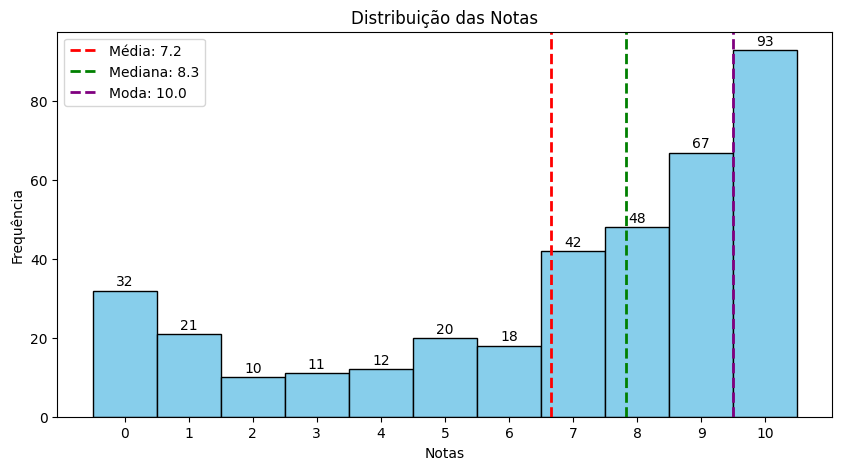

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

# Supondo que `usuarios_processados` seja um dicionário com instâncias de `Usuario`
notas = [usuario.media for usuario in usuarios_processados.values()]

# Cálculo da média, mediana e moda com os valores originais
media = np.mean(notas)
mediana = np.median(notas)
moda_result = mode(notas, keepdims=True)
moda = moda_result.mode[0] if moda_result.count[0] > 0 else None

# Configura os bins para o histograma
bins = np.arange(0, 12, 1)  # Cria os bins de 0 a 11 para garantir que o último bin seja 11
bin_centers = (bins[:-1] + bins[1:]) / 2  # Calcula o centro de cada bin
bin_width = bins[1] - bins[0]  # Largura dos bins

# Plotando o histograma
plt.figure(figsize=(10, 5))
counts, _ = np.histogram(notas, bins=bins)
plt.bar(bin_centers, counts, width=bin_width, color='skyblue', edgecolor='black', align='center')  # Alinha as barras ao centro dos bins

# Adiciona as linhas de média, mediana e moda
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media:.1f}')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.1f}')
plt.axvline(moda, color='purple', linestyle='dashed', linewidth=2, label=f'Moda: {moda:.1f}' if moda is not None else 'Moda: Não definida')

# Adiciona os números acima de cada coluna
for i, count in enumerate(counts):
    plt.text(bin_centers[i], count + 0.5, str(count), ha='center', va='bottom')

# Configurando os ticks do eixo x para 0 a 10 e centralizando as labels
plt.xticks(ticks=bin_centers, labels=[str(int(i)) for i in bin_centers])

plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.title('Distribuição das Notas')

plt.legend()
plt.show()


C:\Users\thiag\AppData\Local\Temp\ipykernel_19276\3186998048.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(notas, shade=True, color='skyblue')


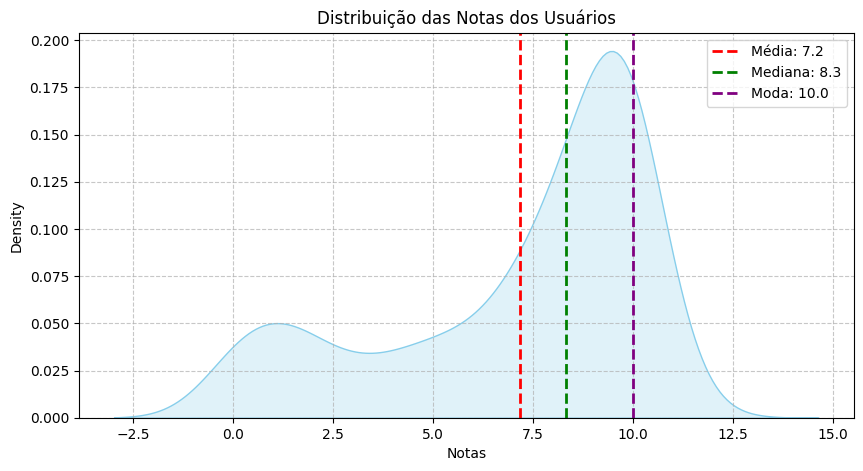

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

# Supondo que `usuarios_processados` seja um dicionário com instâncias de `Usuario`
notas = [usuario.media for usuario in usuarios_processados.values()]

# Cálculo da média, mediana e moda
media = np.mean(notas)
mediana = np.median(notas)
moda_result = mode(notas, keepdims=True)
moda = moda_result.mode[0] if moda_result.count[0] > 0 else None

# Gráfico de Densidade (KDE)
plt.figure(figsize=(10, 5))
sns.kdeplot(notas, shade=True, color='skyblue')
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media:.1f}')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.1f}')
plt.axvline(moda, color='purple', linestyle='dashed', linewidth=2, label=f'Moda: {moda:.1f}' if moda is not None else 'Moda: Não definida')
plt.xlabel('Notas')
plt.title('Distribuição das Notas dos Usuários')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


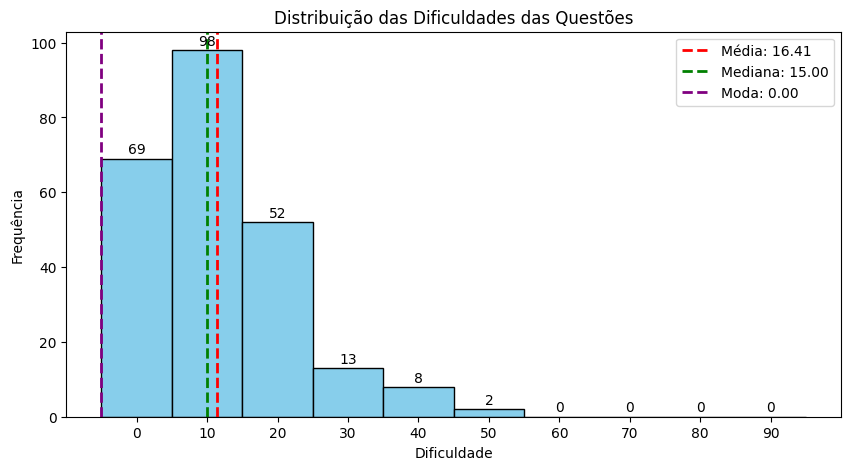

In [44]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from dataclasses import dataclass, field


questoes_filtradas = [questao for questao in questoes_ordenadas if questao.respostas >= 15]
dificuldades = [questao.dificuldade for questao in questoes_filtradas]

# Cálculo das estatísticas
media_dificuldade = np.mean(dificuldades)
mediana_dificuldade = np.median(dificuldades)
moda_dificuldade_result = mode(dificuldades, keepdims=True)
moda_dificuldade = moda_dificuldade_result.mode[0] if moda_dificuldade_result.count[0] > 0 else None

# Definindo os intervalos para o histograma
bins = np.arange(0, 110, 10)  # Intervalos: 0, 10, 20, ..., 100

# Calculando o histograma
hist, bin_edges = np.histogram(dificuldades, bins=bins)

# Plotando o gráfico com ajuste de colunas e labels
plt.figure(figsize=(10, 5))
bar_width = np.diff(bin_edges)  # Largura das colunas
bar_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Centro das colunas

plt.bar(bar_centers, hist, width=bar_width, color='skyblue', edgecolor='black', align='center')

# Adicionando linhas para a média, mediana e moda
plt.axvline(media_dificuldade, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_dificuldade:.2f}')
plt.axvline(mediana_dificuldade, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_dificuldade:.2f}')
plt.axvline(moda_dificuldade, color='purple', linestyle='dashed', linewidth=2, label=f'Moda: {moda_dificuldade:.2f}' if moda_dificuldade is not None else 'Moda: Não definida')

# Adicionando labels centralizadas no topo de cada coluna
for i, value in enumerate(hist):
    plt.text(bar_centers[i], value + 0.5, str(value), ha='center', va='bottom')

# Definindo ticks e labels do eixo x
plt.xticks(ticks=bar_centers, labels=[str(int(label)) for label in bins[:-1]])

plt.xlabel('Dificuldade')
plt.ylabel('Frequência')
plt.title('Distribuição das Dificuldades das Questões')
plt.legend()
plt.show()






C:\Users\thiag\AppData\Local\Temp\ipykernel_19276\4168051114.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(discriminacoes, shade=True, color='skyblue')


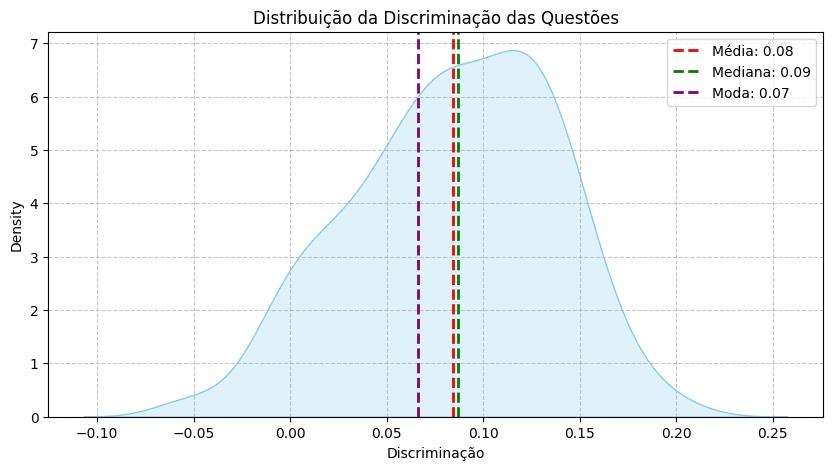

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from dataclasses import dataclass, field

# Supondo que questoes_ordenadas é uma lista de objetos da classe Questao
questoes_filtradas = [questao for questao in questoes_ordenadas if questao.respostas >= 15]
discriminacoes = [questao.discriminacao for questao in questoes_filtradas]

# Cálculo das estatísticas
media_discriminacao = np.mean(discriminacoes)
mediana_discriminacao = np.median(discriminacoes)
moda_discriminacao_result = mode(discriminacoes, keepdims=True)
moda_discriminacao = moda_discriminacao_result.mode[0] if moda_discriminacao_result.count[0] > 0 else None

# Gráfico de Densidade
plt.figure(figsize=(10, 5))
sns.kdeplot(discriminacoes, shade=True, color='skyblue')
plt.axvline(media_discriminacao, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_discriminacao:.2f}')
plt.axvline(mediana_discriminacao, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_discriminacao:.2f}')
plt.axvline(moda_discriminacao, color='purple', linestyle='dashed', linewidth=2, label=f'Moda: {moda_discriminacao:.2f}' if moda_discriminacao is not None else 'Moda: Não definida')
plt.xlabel('Discriminação')
plt.title('Distribuição da Discriminação das Questões')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


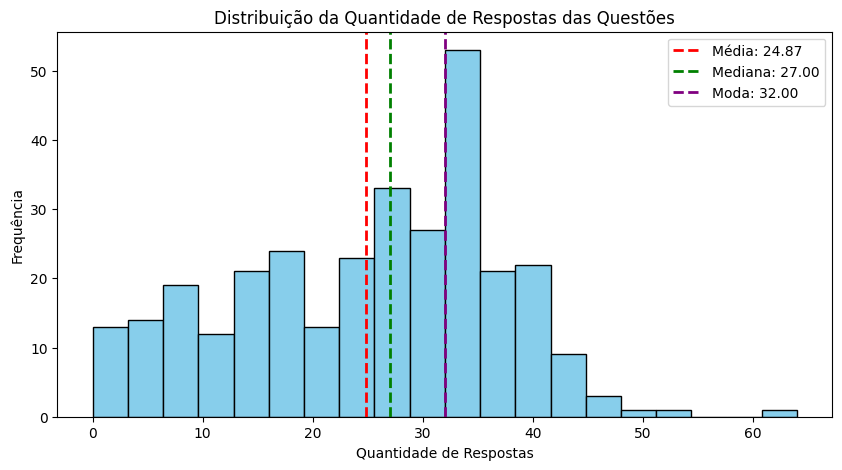

In [46]:


# Supondo que questoes_ordenadas é uma lista de objetos da classe Questao
respostas = [questao.respostas for questao in questoes_ordenadas]

# Cálculo das estatísticas
media_respostas = np.mean(respostas)
mediana_respostas = np.median(respostas)
moda_respostas_result = mode(respostas, keepdims=True)
moda_respostas = moda_respostas_result.mode[0] if moda_respostas_result.count[0] > 0 else None

# Gráfico
plt.figure(figsize=(10, 5))
plt.hist(respostas, bins=20, color='skyblue', edgecolor='black')
plt.axvline(media_respostas, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_respostas:.2f}')
plt.axvline(mediana_respostas, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_respostas:.2f}')
plt.axvline(moda_respostas, color='purple', linestyle='dashed', linewidth=2, label=f'Moda: {moda_respostas:.2f}')
plt.xlabel('Quantidade de Respostas')
plt.ylabel('Frequência')
plt.title('Distribuição da Quantidade de Respostas das Questões')
plt.legend()
plt.show()
